In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
HLA_associations_path = os.path.abspath("../")
sys.path.append(HLA_associations_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import constants, index_tools, data_tools, medical_code_tools
from utilities import *

In [2]:
sns.set_palette("tab10")
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
loaded = False

# Load BioBank Components

In [4]:
DEV_MODE = False
SIGNIFIER = ""

if not loaded:
    biobank_data, biobank_index, med_code_mapping = data_tools.load_all_biobank_components(DEV_MODE, signifier=SIGNIFIER)
    loaded = True

Importing BioBank Index and Data:
Missing 0 biobank index names
Reduced feature set has 369 features.
UK BioBank Data Loaded.
Size: 502536 rows x 369 columns
Elapsed time: 62.4698 seconds


Mapping Medical Codes:   0%|          | 0/354 [00:00<?, ? feature/s]

# Constants

In [5]:
female_specific_cancers = ["breast cancer", "female genital tract cancer", "cervical cancer",
                           "cin/pre-cancer cells cervix", "fallopian tube cancer", "ovarian cancer",
                           "uterine/endometrial cancer", "vaginal cancer", "vulval cancer" ]

male_specific_cancers = ["male genital tract cancer", "penis cancer", "prostate cancer", "testicular cancer"]
sex_specific_cancers = female_specific_cancers + male_specific_cancers

# Viral Codes

In [ ]:
ICD10_data["illness"]

In [128]:
mononucleosis_code = 'infectious mononucleosis / glandular fever / epstein barr virus (ebv)'
hiv_code = 'hiv/aids'
herpes_simplex_code = "herpes simplex"
hepatitis_code = "infective/viral hepatitis"

data_tools.biobank_search(med_code_mapping, biobank_data, ("clovir"))

,coding,meaning,code_format,name,count
2865,1140874370,aciclovir,4,treatment_code,380
4451,1140909954,acyclovir,4,treatment_code,146
4722,1140916890,valaciclovir,4,treatment_code,4
1286,1140864424,famciclovir,4,treatment_code,3
6300,1141186288,clearsore aciclovir 5% cream,4,treatment_code,3
2889,1140874472,ganciclovir,4,treatment_code,0
4944,1140926522,penciclovir,4,treatment_code,0
5382,1141157268,ganciclovir product,4,treatment_code,0
5383,1141157270,famciclovir product,4,treatment_code,0
5384,1141157272,valaciclovir product,4,treatment_code,0


 # Exploring ICD 10 Cancer Types

In [8]:
ICD10_data = biobank_data.loc[~biobank_data["cancer_type_ICD10"].isna()].copy(deep=True)

In [111]:
display(data_tools.biobank_search(med_code_mapping, biobank_data, ("C82")).query("name == 'cancer_type_ICD10'"))
display(data_tools.biobank_search(med_code_mapping, biobank_data,
                                  ("non-hodg")).query("name == 'cancer_type_ICD10' and count != 0"))

,coding,meaning,code_format,name,count
1638,C829,C82.9 Follicular non-Hodgkin's lymphoma; unspe...,19,cancer_type_ICD10,301
1631,C821,C82.1 Mixed small cleaved and large cell; foll...,19,cancer_type_ICD10,77
1630,C820,C82.0 Small cleaved cell; follicular,19,cancer_type_ICD10,41
1632,C822,C82.2 Large cell; follicular,19,cancer_type_ICD10,40
1637,C827,C82.7 Other types of follicular non-Hodgkin's ...,19,cancer_type_ICD10,23
1629,C82,C82 Follicular [nodular] non-Hodgkin's lymphoma,19,cancer_type_ICD10,0
1633,C823,C82.3 Follicular lymphoma grade IIIa,19,cancer_type_ICD10,0
1634,C824,C82.4 Follicular lymphoma grade IIIb,19,cancer_type_ICD10,0
1635,C825,C82.5 Diffuse follicle centre lymphoma,19,cancer_type_ICD10,0
1636,C826,C82.6 Cutaneous follicle centre lymphoma,19,cancer_type_ICD10,0


,coding,meaning,code_format,name,count
1638,C829,C82.9 Follicular non-Hodgkin's lymphoma; unspe...,19,cancer_type_ICD10,301
1666,C859,C85.9 Non-Hodgkin's lymphoma; unspecified type,19,cancer_type_ICD10,237
1648,C838,C83.8 Other types of diffuse non-Hodgkin's lym...,19,cancer_type_ICD10,117
1665,C857,C85.7 Other specified types of non-Hodgkin's l...,19,cancer_type_ICD10,115
1637,C827,C82.7 Other types of follicular non-Hodgkin's ...,19,cancer_type_ICD10,23
1649,C839,C83.9 Diffuse non-Hodgkin's lymphoma; unspecified,19,cancer_type_ICD10,14


In [129]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7125417/
viral_associated_cancers = ["hodgkin's lymphoma", "gastric carcinoma", "burkitt's lymphoma", "nasopharyngeal carcinoma"]
ICD10_viral_associated_cancer_labels = {
    "burkitt's lymphoma": ["C83.7"],
    "nasopharyngeal carcinoma": ["C11"],
    "gastric carcinoma": ["C16", "D37.1"],
    "hodgkin's disease": ["C81.9", "C81.7"],
    "kaposi's sarcoma": ["C46"],
#     "liver cancer": ["C22"],
#     "anal cancer": ["C21"],
#     "non-hodgkin's lymphoma": ["C82.9", "C82.7", "C83.8", "C85.7", "C83.9"]
}

viral_labels = {
    "mononucleosis_code": 'infectious mononucleosis / glandular fever / epstein barr virus (ebv)',
    "hiv_code": 'hiv/aids',
    "herpes_simplex_code": "herpes simplex",
    "hepatitis_code": "infective/viral hepatitis"
}

antiviral_labels = {"acyclovir": "clovir"}

ICD10_viral_associated_cancer_labels

{"burkitt's lymphoma": ['C83.7'],
 'nasopharyngeal carcinoma': ['C11'],
 'gastric carcinoma': ['C16', 'D37.1'],
 "hodgkin's disease": ['C81.9', 'C81.7'],
 "kaposi's sarcoma": ['C46']}

In [120]:
def apply_grouping(variable_tag: str, grouping: dict, default: str = None) -> str:
    """"""
    if isinstance(variable_tag, float):
        return default
    
    for label, tag_set in grouping.items():
        if isinstance(tag_set, str):
            if tag_set in variable_tag:
                return label
            continue

        for tag in tag_set:
            if tag in variable_tag:
                return label

    return default

In [131]:
ICD10_data["viral_infection"] = ICD10_data["illness_code"].apply(apply_grouping, grouping=viral_labels,
                                                                 default="no viral illness")
ICD10_data["given_antiviral"] = ICD10_data["treatment_code"].apply(apply_grouping, grouping=antiviral_labels,
                                                                 default="no antiviral")

In [132]:
ICD10_data["virus_associated_cancer_status"] = ICD10_data["cancer_type_ICD10"].apply(apply_grouping, 
                                                                              grouping=ICD10_viral_associated_cancer_labels,
                                                                              default="non-viral associated")

# Viral Associated Summary Statistics

In [133]:
variables_of_interest = ["sex", "viral_infection", "given_antiviral"]
grouping = ["virus_associated_cancer_status"]

grouping_df = ICD10_data[grouping + variables_of_interest].copy(deep=True)
grouping_df["total"] = grouping_df[variables_of_interest[0]] != "nothing"

for variable in variables_of_interest:
    for variable_option in sorted(grouping_df[variable].unique()):
        grouping_df[variable_option.lower().replace(" ", "_")] = grouping_df[variable] == variable_option

grouping_df = grouping_df.groupby("virus_associated_cancer_status").sum().reset_index()

# for variable in exclude(grouping_df.columns, grouping + ["total"]):
#     grouping_df[variable + "_fraction"] = grouping_df[variable] / grouping_df["total"]

grouping_df

,virus_associated_cancer_status,total,female,male,hepatitis_code,herpes_simplex_code,hiv_code,mononucleosis_code,no_viral_illness,acyclovir,no_antiviral
0,burkitt's lymphoma,25,4,21,0,0,2,0,23,0,25
1,gastric carcinoma,508,166,342,0,0,0,0,508,1,507
2,hodgkin's disease,90,42,48,0,0,0,0,90,1,89
3,kaposi's sarcoma,15,0,15,0,0,3,0,12,1,14
4,nasopharyngeal carcinoma,32,14,18,0,0,0,0,32,0,32
5,non-viral associated,82813,46015,36798,72,2,23,18,82698,117,82696


# Viral Associated Age of Diagnosis Plots 

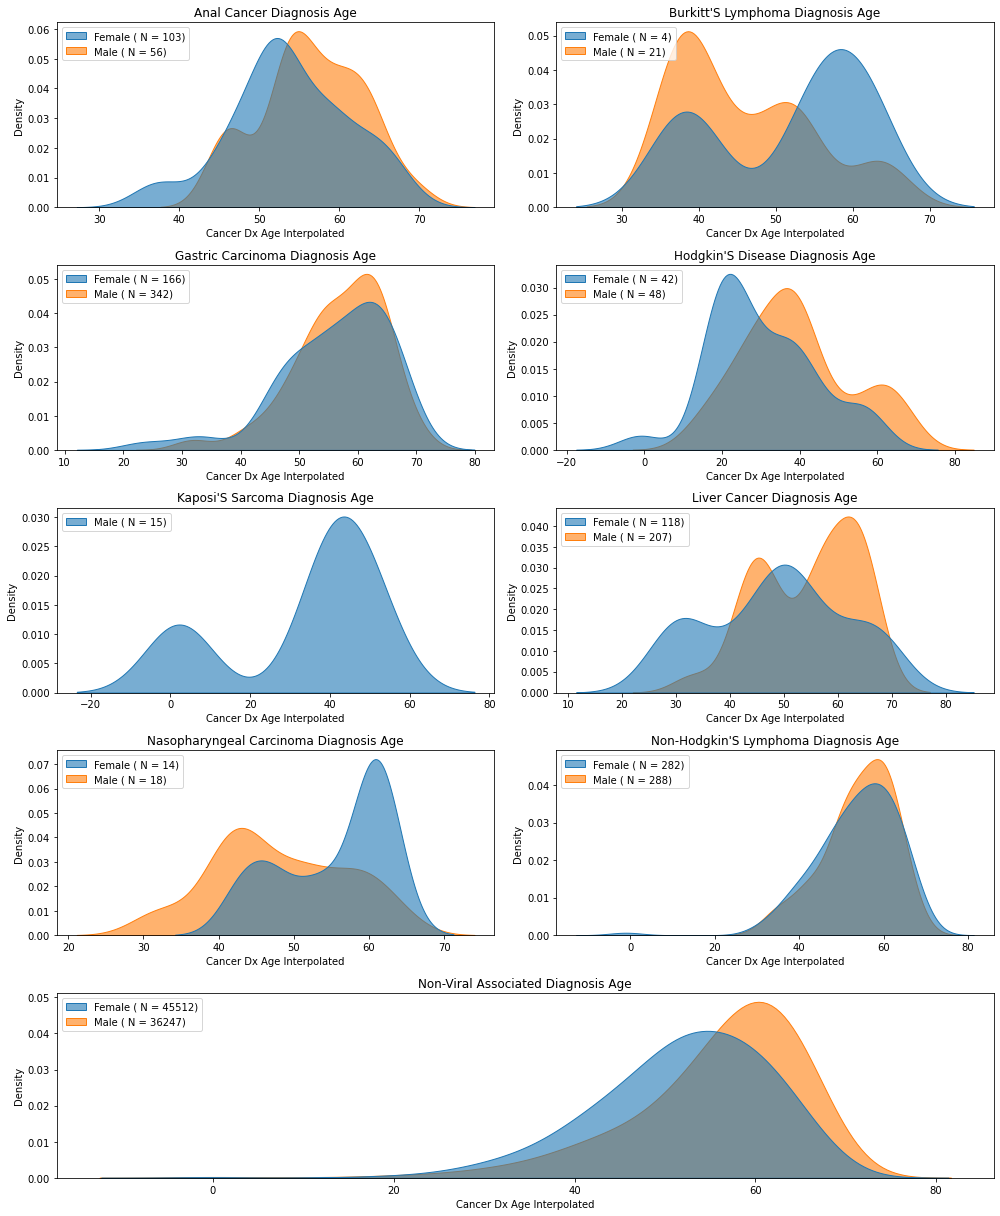

In [118]:
grouping = ICD10_data.groupby(["virus_associated_cancer_status"])
grouping = {label: subset for label, subset in grouping}

x, y, hue = "cancer_dx_age_interpolated", "density", "sex"

fig, axes = create_subplot(len(grouping), width=14, height_per=3)
for (cancer_type, subset), ax in zip(ICD10_data.groupby(["virus_associated_cancer_status"]), axes):
    sns_wrapper(sns.kdeplot, data=subset, x=x, hue=hue, ax=ax, bw_method=.4, common_norm=False, shade=True)
#     sns.histplot(data=subset, x=x, hue=hue, ax=ax, multiple="dodge", alpha=.3)
    add_plt_labels(ax, x=x, y=y)
    ax.set_title(f"{cancer_type.title()} Diagnosis Age")
    ax.legend(loc="upper left")

fig.tight_layout()